Objectives
1. Identify diamensions, structure and summary of the dataset
2. Plot Histogram/Bar plots for the variables
3. Identify outliers and treat them
4. Check if the dataset has any "na" variables. If so treat them.
5. Standardize the continuous variables

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
#Loading the dataset
data=pd.read_csv("./Dataset/auto-mpg.csv")

In [7]:
#Finding Diamensions
np.shape(data)

(398, 9)

In [8]:
#Finding Structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
#Finding Summary
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Understanding Data 

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,model_year
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,70
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,70
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,70
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,70
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,70


In [11]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


Visualizing the Data

(array([13., 74., 62., 59., 57., 49., 39., 28., 11.,  6.]),
 array([ 9.  , 12.56, 16.12, 19.68, 23.24, 26.8 , 30.36, 33.92, 37.48,
        41.04, 44.6 ]),
 <BarContainer object of 10 artists>)

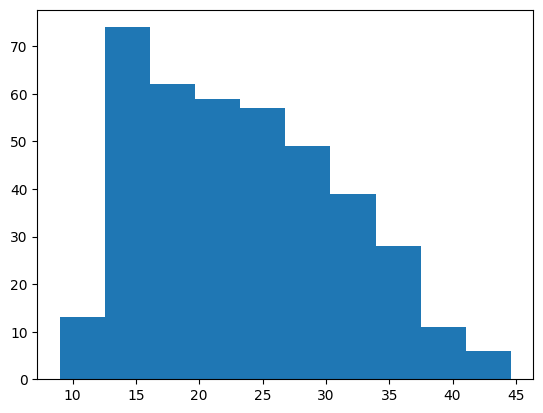

In [66]:
#Histogram for plt
plt.hist(data['mpg'])

Comparing plt.hist and sns.histplot

Which looks better?

<Axes: xlabel='mpg', ylabel='Count'>

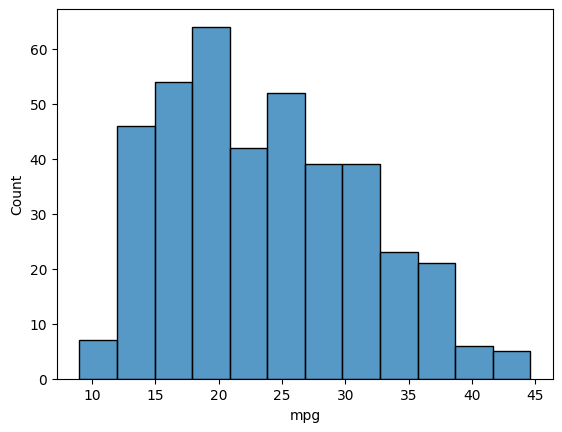

In [73]:
sns.histplot(data['mpg'])

The borders of sns.histplot makes it look more good

In [13]:
data['cylinders']=pd.Categorical(data['cylinders'])

<Axes: xlabel='cylinders', ylabel='count'>

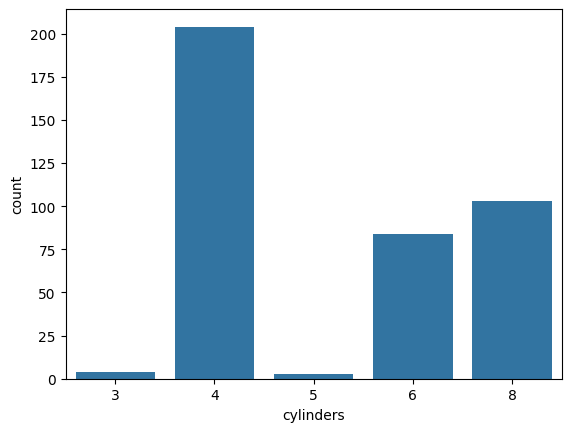

In [14]:
sns.countplot(x=data['cylinders'])

<Axes: xlabel='displacement', ylabel='Count'>

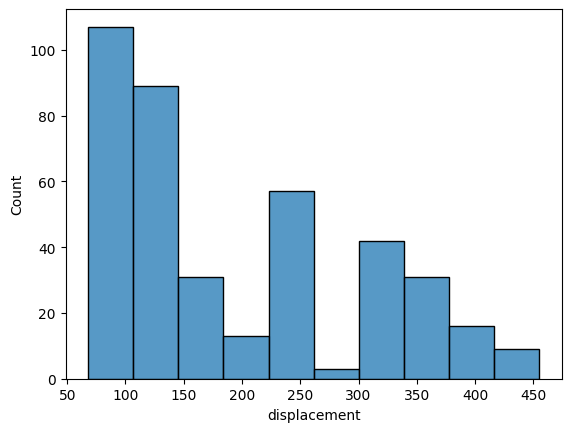

In [76]:
sns.histplot(data["displacement"])

(array([55., 78., 50., 71., 23., 41., 26., 20., 16., 18.]),
 array([ 0. ,  9.3, 18.6, 27.9, 37.2, 46.5, 55.8, 65.1, 74.4, 83.7, 93. ]),
 <BarContainer object of 10 artists>)

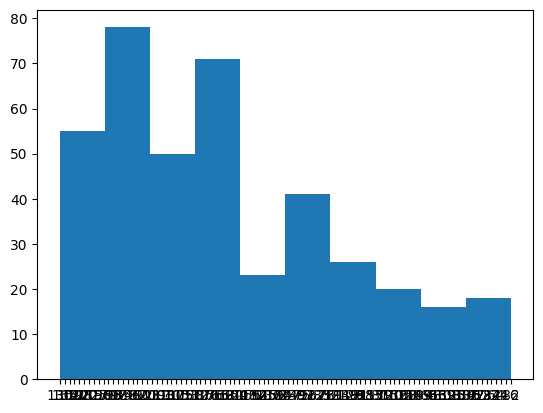

In [16]:
plt.hist(data['horsepower'])

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

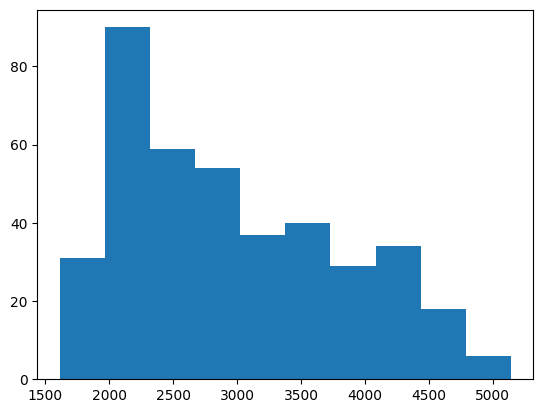

In [17]:
plt.hist(data['weight'])

<Axes: xlabel='acceleration', ylabel='Count'>

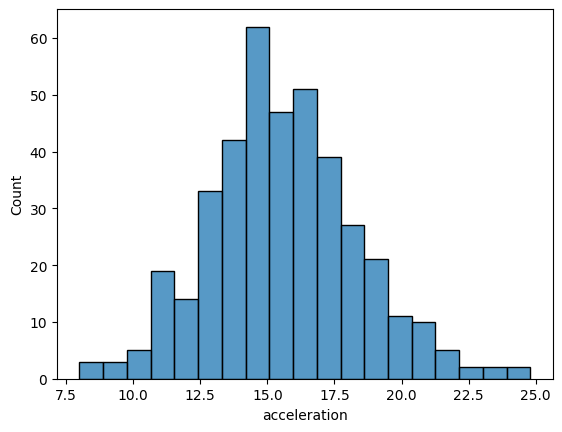

In [72]:
sns.histplot(data['acceleration'])

In [ ]:
data['model_year']=pd.Categorical(data['model_year'])

<Axes: xlabel='count', ylabel='model_year'>

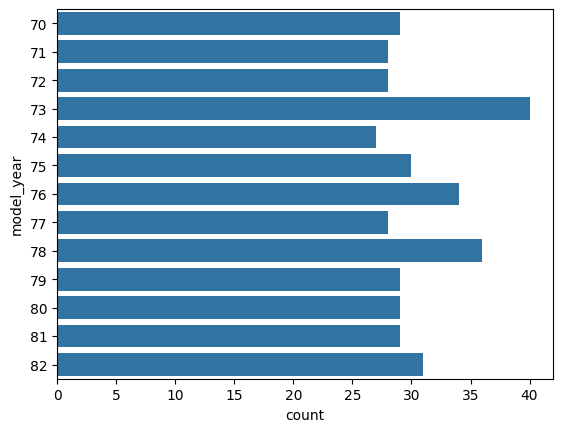

In [23]:
sns.countplot(data['model_year'])

In [28]:
data['origin']=pd.Categorical(data['origin'])

<Axes: xlabel='origin', ylabel='count'>

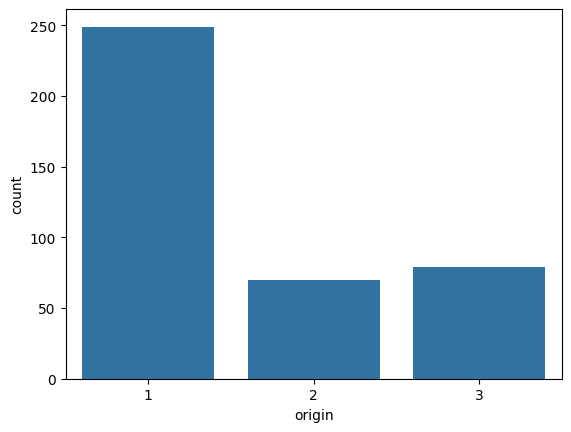

In [29]:
sns.countplot(x=data['origin'])

Outlier Detection and Treatment

Outlier test in mpg

<Axes: xlabel='mpg'>

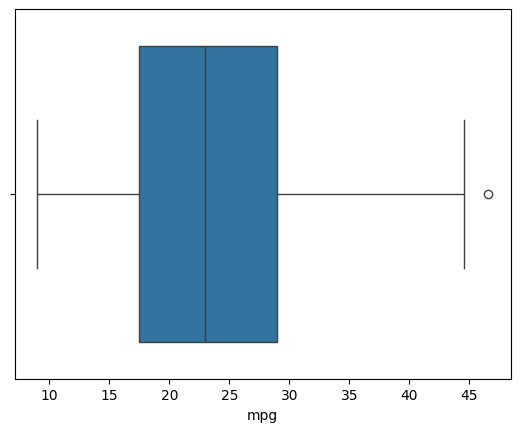

In [32]:
sns.boxplot(x=data['mpg'])

In [ ]:
def find_Intial_outliers(data):
  outliers=[]
  threshold=3
  #Threshold = 3 means that the maximum limit of permissible elements is in range -3sigma to +3sigma
  mean=np.mean(data)
  std=np.std(data)
  #std means standard deviation
  #we will find the z score for each valu and we wil compare the z score with threshold to see if it is an outlier
  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers

Initial test: Any value>3sigma or < -3sigma is considered outlier

In [35]:
print(find_Intial_outliers(data['mpg']))

[]


Okay, so this test failed
So we the Interquartile Range (IQR) method

In [41]:
q1=np.percentile(data['mpg'],25)
q3=np.percentile(data['mpg'],75)
iqr=q3-q1

In [42]:
iqr

11.5

In [44]:
lower_fence=q1-1.5*iqr
print(lower_fence)

0.25


In [45]:
upper_fence=q3+1.5*iqr
print(upper_fence)

46.25


In [ ]:
for i in data['mpg']:
    if(i<lower_fence or i>upper_fence):
        print(i)


46.6


So, we have finally got the outlier.

Let's remove it and see the boxplot
But we can't actually delete it because it's not an array but a table.

So we replace it with mean.

In [57]:
data['mpg'].replace(46.6,data['mpg'].mean(),inplace=True)


Now let's check with Boxplot

<Axes: xlabel='mpg'>

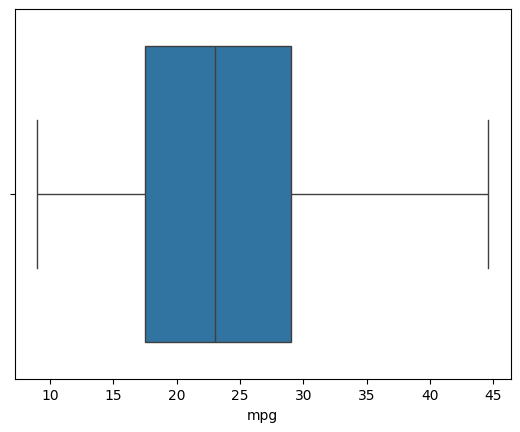

In [59]:
sns.boxplot(x=data['mpg'])

Finally, the outlier is treated.

Now let's make a function so that we can reuse that for all the continuous variables

In [60]:
def iqr_test(data):
    outlier=[]
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    lower_fence=q1-1.5*iqr
    upper_fence=q3+1.5*iqr
    for i in data:
        if(i<lower_fence or i>upper_fence):
            outlier.append(i)
    return outlier



Now let's check for other continuous varaibles

Outlier check and treatment for Displacement

<Axes: xlabel='displacement'>

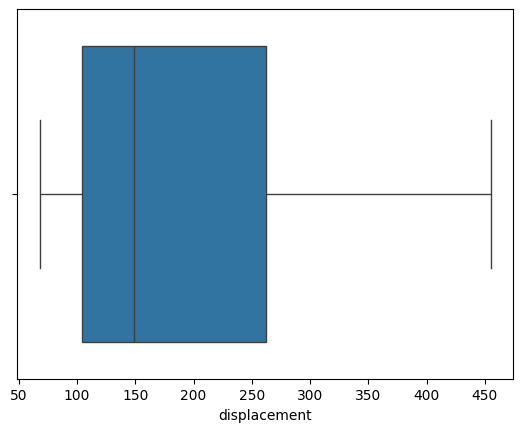

In [64]:
sns.boxplot(x=data['displacement'])

No outliers in Displacement

Outlier Treatment in Horsepower

<Axes: xlabel='horsepower'>

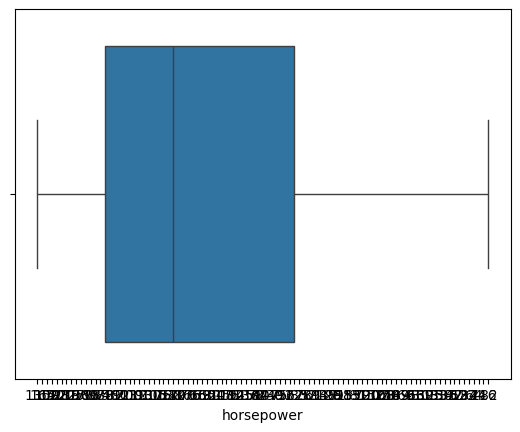

In [80]:
sns.boxplot(x=data['horsepower'])

No outlier in Horsepower as well

Now let's check for Weight

<Axes: xlabel='weight'>

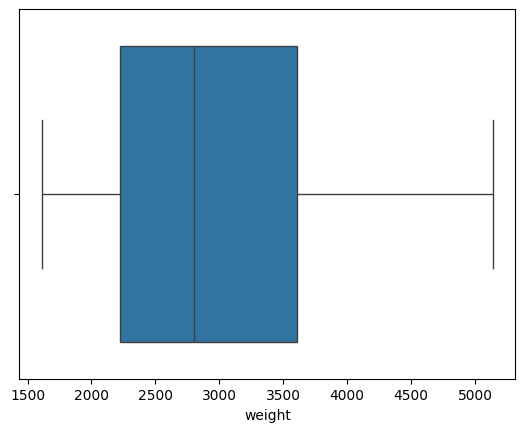

In [85]:
sns.boxplot(x=data['weight'])

No outlier in Weight

Outlier detection in Acceleration

<Axes: xlabel='acceleration'>

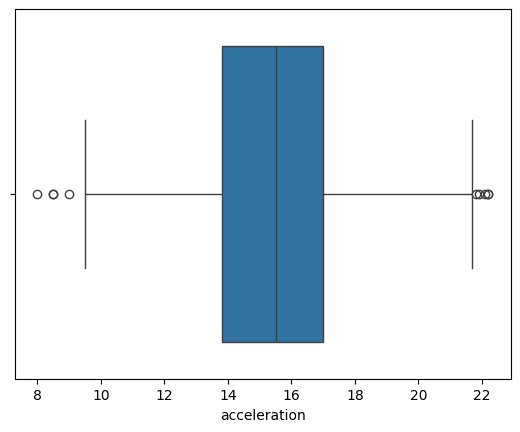

In [121]:
sns.boxplot(x=data['acceleration'])

In [118]:
print(find_Intial_outliers(data['acceleration']))

[24.8, 24.6, 24.8, 24.6, 23.7, 23.5, 23.5, 23.5, 24.8, 24.6]


In [119]:
#Removing initial outliers
temp=[]
temp=find_Intial_outliers(data['acceleration'])
for i in temp:
    data['acceleration'].replace(i,data['acceleration'].mean(),inplace=True)

In [122]:
print(iqr_test(data['acceleration']))

[9.0, 8.5, 8.5, 8.0, 22.2, 22.1, 21.9, 22.2, 21.8]


In [124]:
temp=[]
temp=iqr_test(data['acceleration'])
for i in temp:
    data['acceleration'].replace(i,data['acceleration'].mean(),inplace=True)

<Axes: xlabel='acceleration'>

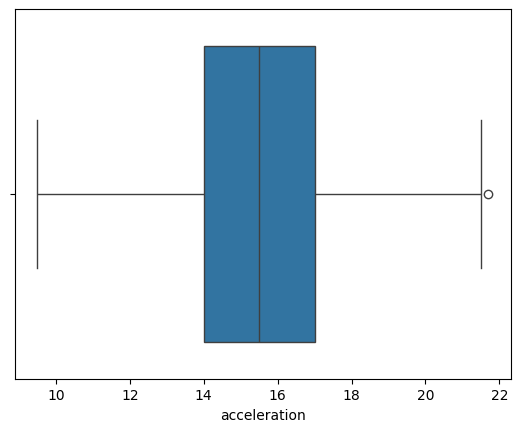

In [127]:
sns.boxplot(x=data['acceleration'])

Okay one outlier still remaining

let's check with iqr test once more

In [128]:
print(iqr_test(data['acceleration']))

[21.7]


In [130]:
data['acceleration'].replace(21.7,data['acceleration'].mean(),inplace=True)

<Axes: xlabel='acceleration'>

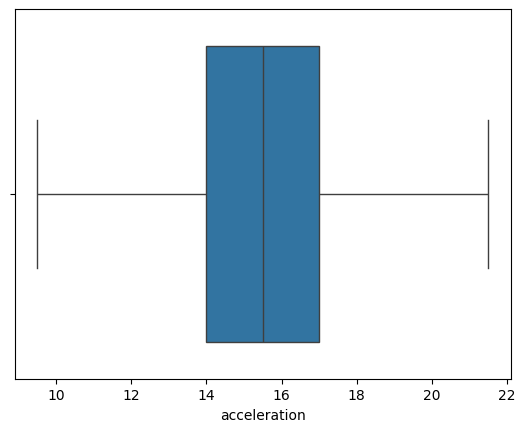

In [132]:
sns.boxplot(x=data['acceleration'])

Finally, the outlier is treated.

Thus all continuous variable are treated.

Interested contributors kindly check if my outlier checking is correct for acceleration because even after first iqr_test there was one outlier which had to be removed by repeating iqr_test for second time. But I feel that this shouldn't have happened as the outlier should have been detected and removed in the first go

Now let's check if the dataset has any "na" variables. If so treat them.

In [136]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
model_year      0
dtype: int64

No "na" variables

Standardization of data

In [137]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,model_year
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,70
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,70
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,70
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,70
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,70


In [140]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
data[['mpg','displacement','horsepower','weight','acceleration']]=scaler.fit_transform(data[['mpg','displacement','horsepower','weight','acceleration']])

ValueError: could not convert string to float: '?'

The error in the previous standardization step was a ValueError. This happened because the horsepower column contains non-numeric values, specifically the character '?'. The MinMaxScaler can only work with numerical data. We'll need to handle these non-numeric values before we can standardize the column.
'?' is likely a mistake in the dataset

In [141]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

This line attempts to convert the horsepower column to a numeric data type.

pd.to_numeric() is a pandas function for converting a column to a numeric type.

data['horsepower'] selects the 'horsepower' column.

errors='coerce' is important here. 

If pandas encounters any value in the column that cannot be converted to a number (like the '?' we saw), 
it will replace that value with NaN (Not a Number), which is a standard way to represent missing values in pandas.

In [ ]:
#This line handles the missing values (NaN) that were created in the previous step.
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)

Now let's retry standardization

In [143]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
data[['mpg','displacement','horsepower','weight','acceleration']]=scaler.fit_transform(data[['mpg','displacement','horsepower','weight','acceleration']])

In [144]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,model_year
0,0.252809,8,0.617571,0.456522,0.536150,0.208333,70,1,chevrolet chevelle malibu,70
1,0.168539,8,0.728682,0.646739,0.589736,0.166667,70,1,buick skylark 320,70
2,0.252809,8,0.645995,0.565217,0.516870,0.125000,70,1,plymouth satellite,70
3,0.196629,8,0.609819,0.565217,0.516019,0.208333,70,1,amc rebel sst,70
4,0.224719,8,0.604651,0.510870,0.520556,0.083333,70,1,ford torino,70


Now the full data is standardized